**DT Risky Bank Loan**

In [432]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score



In [433]:
from sklearn.ensemble import RandomForestClassifier

In [434]:
credit = pd.read_csv('/content/credit.csv')

In [435]:
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,skilled employee,2,none,yes,1
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,skilled employee,2,none,yes,2


In [436]:
credit.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_length       object
installment_rate         int64
personal_status         object
other_debtors           object
residence_history        int64
property                object
age                      int64
installment_plan        object
housing                 object
existing_credits         int64
job                     object
dependents               int64
telephone               object
foreign_worker          object
default                  int64
dtype: object

In [437]:
credit.describe()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,dependents,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [438]:
credit.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
job                     0
dependents              0
telephone               0
foreign_worker          0
default                 0
dtype: int64

In [439]:
credit


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,skilled employee,2,none,yes,1
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,skilled employee,2,none,yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,repaid,furniture,1736,< 100 DM,4 - 7 yrs,3,female,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,1
996,< 0 DM,30,repaid,car (used),3857,< 100 DM,1 - 4 yrs,4,divorced male,none,...,building society savings,40,none,own,1,mangement self-employed,1,yes,yes,1
997,unknown,12,repaid,radio/tv,804,< 100 DM,> 7 yrs,4,single male,none,...,other,38,none,own,1,skilled employee,1,none,yes,1
998,< 0 DM,45,repaid,radio/tv,1845,< 100 DM,1 - 4 yrs,4,single male,none,...,unknown/none,23,none,for free,1,skilled employee,1,yes,yes,2


In [440]:
credit.savings_balance.value_counts()

< 100 DM         603
unknown          183
101 - 500 DM     103
501 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

In [441]:
credit['savings_balance'].value_counts()

< 100 DM         603
unknown          183
101 - 500 DM     103
501 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

In [442]:
#checking unique values in each colm
for i in credit.columns:
  print(i)
print(credit[i].nunique())

checking_balance
months_loan_duration
credit_history
purpose
amount
savings_balance
employment_length
installment_rate
personal_status
other_debtors
residence_history
property
age
installment_plan
housing
existing_credits
job
dependents
telephone
foreign_worker
default
2


In [443]:

categorical_cols = ['checking_balance','credit_history',
'purpose','savings_balance','employment_length',
'personal_status','other_debtors','property',
'installment_plan','housing', 'job', 'telephone',
'foreign_worker']

In [444]:
le = LabelEncoder()
# defining label encoder model and create LabelEncoder class 

In [445]:
for col in categorical_cols:
    credit[col] = le.fit_transform(credit[col])


In [446]:
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,1,6,0,7,1169,4,3,4,3,2,...,2,67,1,1,2,1,1,1,1,1
1,0,48,4,7,5951,2,1,2,1,2,...,2,22,1,1,1,1,1,0,1,2
2,3,12,0,4,2096,2,2,2,3,2,...,2,49,1,1,1,3,2,0,1,1
3,1,42,4,5,7882,2,2,2,3,1,...,0,45,1,0,1,1,2,0,1,1
4,1,24,1,1,4870,2,1,3,3,2,...,3,53,1,0,2,1,2,0,1,2


In [447]:
X = credit.drop('default',axis = 1)
y = credit.default

In [448]:
X

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker
0,1,6,0,7,1169,4,3,4,3,2,4,2,67,1,1,2,1,1,1,1
1,0,48,4,7,5951,2,1,2,1,2,2,2,22,1,1,1,1,1,0,1
2,3,12,0,4,2096,2,2,2,3,2,3,2,49,1,1,1,3,2,0,1
3,1,42,4,5,7882,2,2,2,3,1,4,0,45,1,0,1,1,2,0,1
4,1,24,1,1,4870,2,1,3,3,2,4,3,53,1,0,2,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,4,5,1736,2,2,3,1,2,4,2,31,1,1,1,3,1,0,1
996,1,30,4,2,3857,2,1,4,0,2,4,0,40,1,1,1,0,1,1,1
997,3,12,4,7,804,2,3,4,3,2,4,1,38,1,1,1,1,1,0,1
998,1,45,4,7,1845,2,1,4,3,2,4,3,23,1,0,1,1,1,1,1


In [449]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 10)

In [450]:
clsfr = DecisionTreeClassifier(criterion= 'entropy') 

In [451]:
clsfr.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [452]:
clsfr.predict(x_train)

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,

In [453]:
fig = plt.figure(figsize = (25,25), dpi=600)
plot_tree(clsfr,feature_names = x_train.columns, filled = True);
fig.savefig("tree.png")

Output hidden; open in https://colab.research.google.com to view.

In [454]:
predictions = clsfr.predict(x_test)

In [455]:
predictions

array([1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1,

In [456]:
confusion_matrix(y_test, predictions)


array([[263,  83],
       [ 79,  75]])

In [457]:
from sklearn.metrics import ConfusionMatrixDisplay


In [458]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clsfr.classes_)


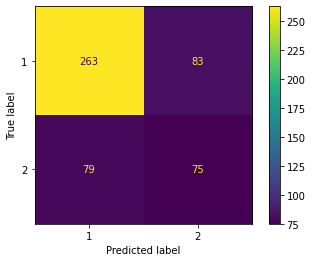

In [459]:
disp.plot()

In [460]:
print(accuracy_score(y_test,predictions)*100,'%')

67.60000000000001 %


In [461]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [462]:
precision_score(y_test,predictions)

0.7690058479532164

In [463]:
recall_score(y_test,predictions)


0.7601156069364162

In [464]:
f1_score(y_test,predictions)


0.7645348837209303